In [1]:
from temp_profile import TempProfile2D
from eutectic_interface import EuteticInterface

import glob
import numpy as np
import pandas as pd

from scipy.stats import pearsonr
from scipy.signal import find_peaks, peak_prominences

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
testpath = "../data/gaia/temp_profile/europa/EuropaParameterStudy/Europa_D25km_eta1e+14_2D_data.txt"
test_profile = TempProfile2D.from_filepath(testpath)

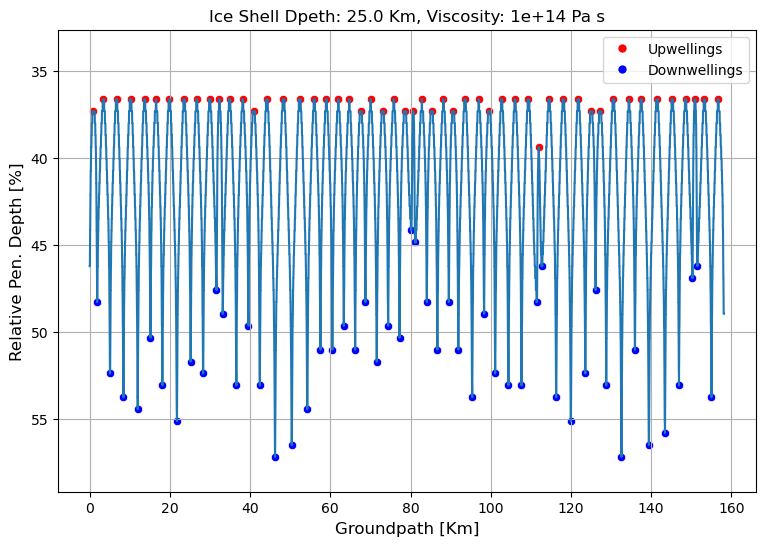

In [ ]:
test_profile.plot_relative_eutectic_depth(peaks = True)

In [ ]:
twod_paths = glob.glob('../data/gaia/temp_profile/europa/EuropaParameterStudy/*_2D_data.txt')
twod_dict={}


for filepath in twod_paths:
    temp_profile = TempProfile2D.from_filepath(filepath)
    twod_dict[filepath] = temp_profile

In [ ]:
eutectics_stats = pd.read_csv("../data/gaia/temp_profile/europa/EuropaParameterStudy/cell_counting/master_eutectic_df.csv")

eutectics_stats = eutectics_stats.loc[:, 'Total Shell Depth [Km]':]
eutectics_stats['Viscosity [Pa s]'] = eutectics_stats['Viscosity [Pa s]'].str.replace('eta1e+', '').astype(int)
eutectics_stats.sort_values(by = ['Total Shell Depth [Km]', 'Viscosity [Pa s]'])

,Total Shell Depth [Km],Viscosity [Pa s],Deapest Downwelling [Km],Mean Upwelling Height [Km],Estimated Number of Convection Cells,Convective Height Imbalance Ratio
1,25.0,12,10.238,5.790242,165,1.758109
10,25.0,13,10.394,6.317776,85,2.110294
4,25.0,14,14.298,9.210346,52,3.870923
14,25.0,15,20.069,0.000000,0,0.000000
11,30.0,14,17.339,10.453604,48,4.440521
0,30.0,15,24.149,0.000000,0,0.000000
15,40.0,14,20.667,12.250351,37,5.142973
5,40.0,15,26.762,19.921196,46,5.468196
7,60.0,12,12.111,5.342018,113,1.800566
12,60.0,13,12.111,7.468431,65,2.669985


/Users/willbyrne/opt/anaconda3/envs/dlr_radar/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


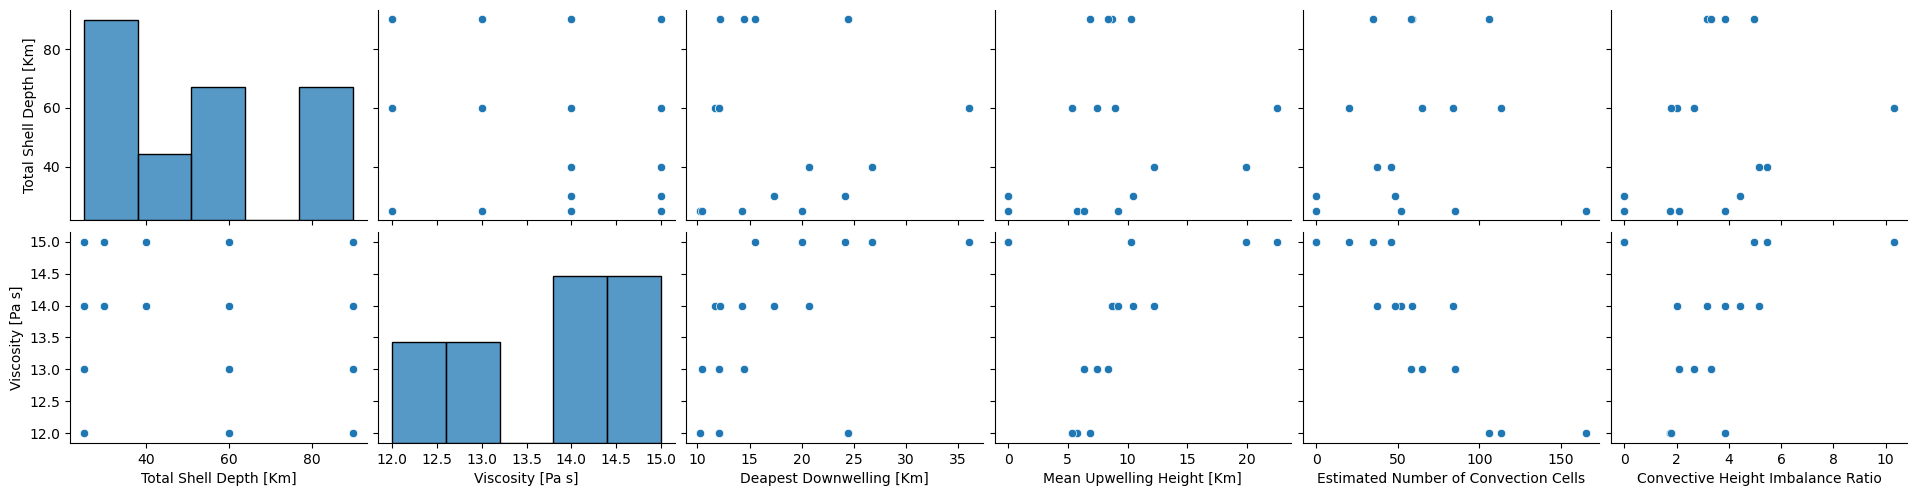

In [ ]:
sns.pairplot(
    eutectics_stats,
    y_vars=["Total Shell Depth [Km]", "Viscosity [Pa s]"],
    aspect= 1.3
)

In [ ]:
eutectics_stats.columns

Index(['Total Shell Depth [Km]', 'Viscosity [Pa s]',
       'Deapest Downwelling [Km]', 'Mean Upwelling Height [Km]',
       'Estimated Number of Convection Cells',
       'Convective Height Imbalance Ratio'],
      dtype='object')

/Users/willbyrne/opt/anaconda3/envs/dlr_radar/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


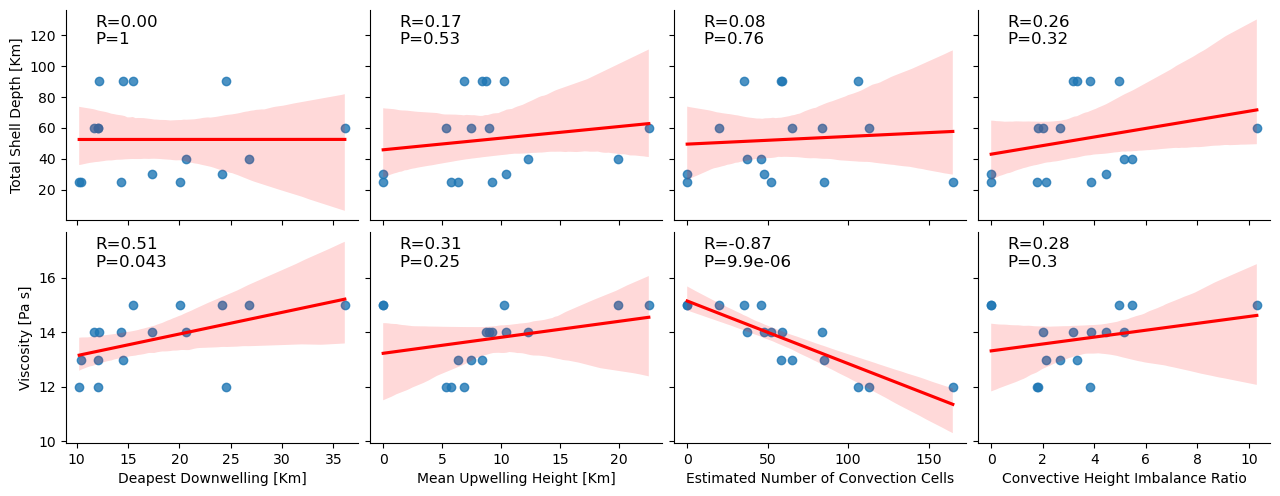

In [ ]:
def corrfunc(x, y, **kws):
    r, p = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f'R={r:.2f}\nP={p:.2g}', 
                xy=(0.1, 0.9), xycoords=ax.transAxes,
                fontsize=12, ha='left', va='center')

g = sns.pairplot(
    eutectics_stats,
    y_vars=["Total Shell Depth [Km]", "Viscosity [Pa s]"],
    x_vars = ['Deapest Downwelling [Km]','Mean Upwelling Height [Km]', 'Estimated Number of Convection Cells','Convective Height Imbalance Ratio'],
    plot_kws={'line_kws':{'color':'red'}},
    aspect = 1.3,
    kind = 'reg'
)

g.map(corrfunc)